In [1]:
from plane_packing import Plane, pack_plane
from packing_orders import random_order, back_to_front, front_to_back, windows_first, alley_first

import numpy as np
import matplotlib.pyplot as plt

In [2]:
from ipywidgets import FloatProgress
from IPython.display import display

In [3]:
def pack_helper(rows, seats, dfun):
    p = Plane(rows, seats)
    n = pack_plane(p,dfun(p))
    return n

In [9]:
Ns = {'rnd':[],'b2f':[],'f2b':[],'wd1':[],'al1':[]}
N = 1000
rows, seats = 12, 3

f = FloatProgress(min=0, max=100, description = 'Packing:')
display(f)
for j in range(N):
    Ns['rnd'].append(pack_helper(rows,seats,random_order))
    Ns['b2f'].append(pack_helper(rows,seats,back_to_front))
    Ns['f2b'].append(pack_helper(rows,seats,front_to_back))
    Ns['wd1'].append(pack_helper(rows,seats,windows_first))
    Ns['al1'].append(pack_helper(rows,seats,alley_first))
    if not j%(N/100): f.value+=1

A Jupyter Widget

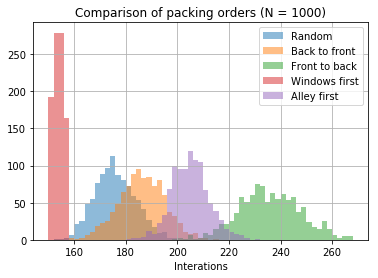

In [12]:
v = range(150,270,2)
plt.hist(Ns['rnd'], v, alpha=0.5, label = 'Random')
plt.hist(Ns['b2f'], v, alpha=0.5, label = 'Back to front')
plt.hist(Ns['f2b'], v, alpha=0.5, label = 'Front to back')
plt.hist(Ns['wd1'], v, alpha=0.5, label = 'Windows first')
plt.hist(Ns['al1'], v, alpha=0.5, label = 'Alley first')
plt.grid(True)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.legend()
plt.xlabel('Interations')
plt.title('Comparison of packing orders (N = {})'.format(N))
plt.savefig('histogram.jpg')
plt.show()